# Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models

In [206]:
#data processing
import pandas as pd
import numpy as np

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# machine learning algorithms
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [171]:
#load dataset
df=pd.read_csv("customerchurn.csv")

In [172]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [173]:
df.shape

(7043, 21)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [175]:
# convert Total Charges to numeric datatype
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [176]:
#checking null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values in Total charges. 

In [177]:
#replace missing values 
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace = True)

In [178]:
#dropping unique identifier column
df=df.drop(['customerID'], axis=1)

In [179]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We have 7043 customer observations for 19 telecom attributes with Target- Customer Churn.

In [180]:
profile=ProfileReport(df,title='Profiling Report')
profile

Let us encode the non-numeric data so that we can visualise the data more meaningfully.

In [181]:
columns = ['gender','Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn' ]

for i in columns:
    LE=LabelEncoder()
    df[i] = LE.fit_transform(df[i])

In [182]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Exploratory Data Analysis

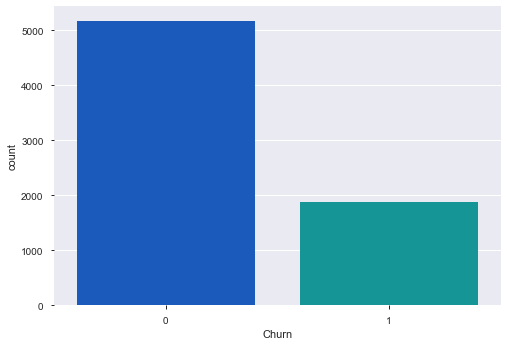

In [183]:
sns.countplot(x=df['Churn'], palette='winter')

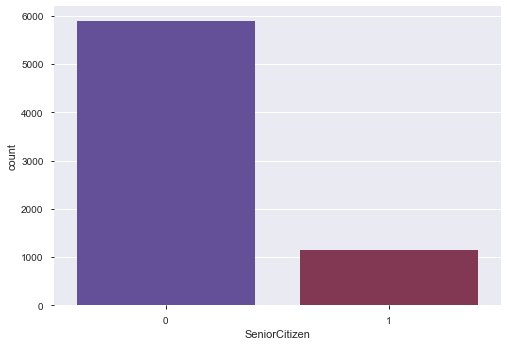

In [184]:
sns.countplot(x=df['SeniorCitizen'], palette='twilight')

Majority of the telecom users are not senior citizens.

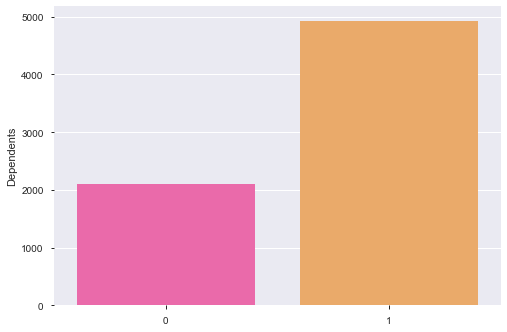

In [185]:
sns.barplot(x=df['gender'].value_counts().index, y=df['Dependents'].value_counts(),palette='spring')

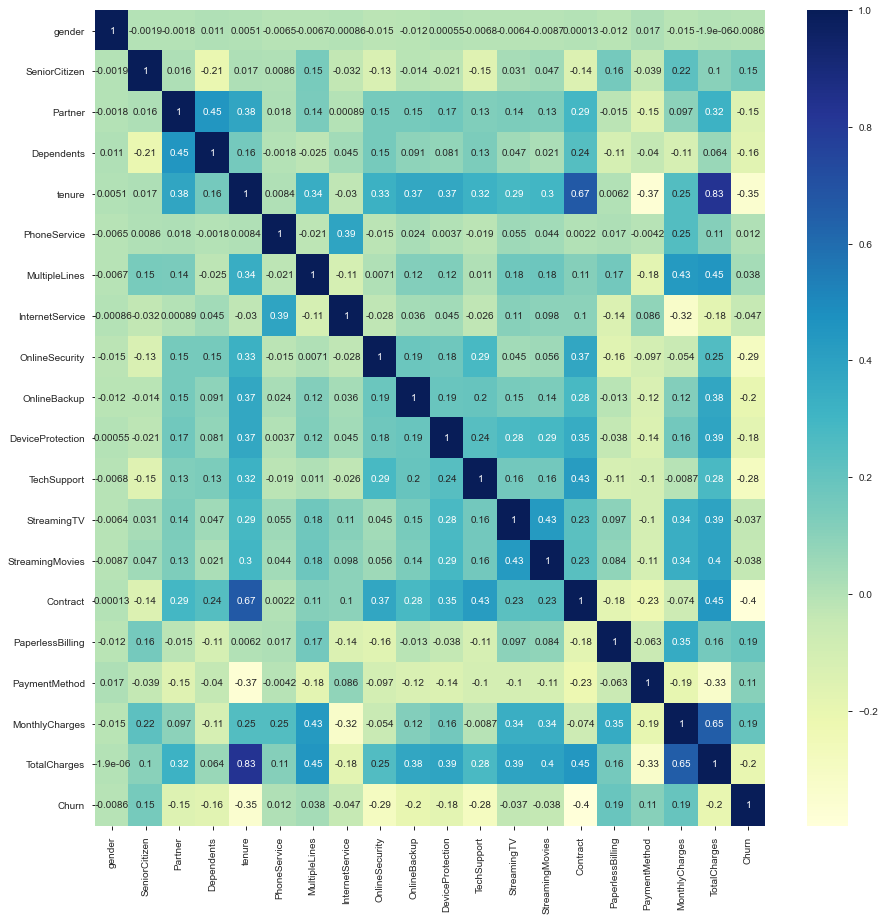

In [186]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

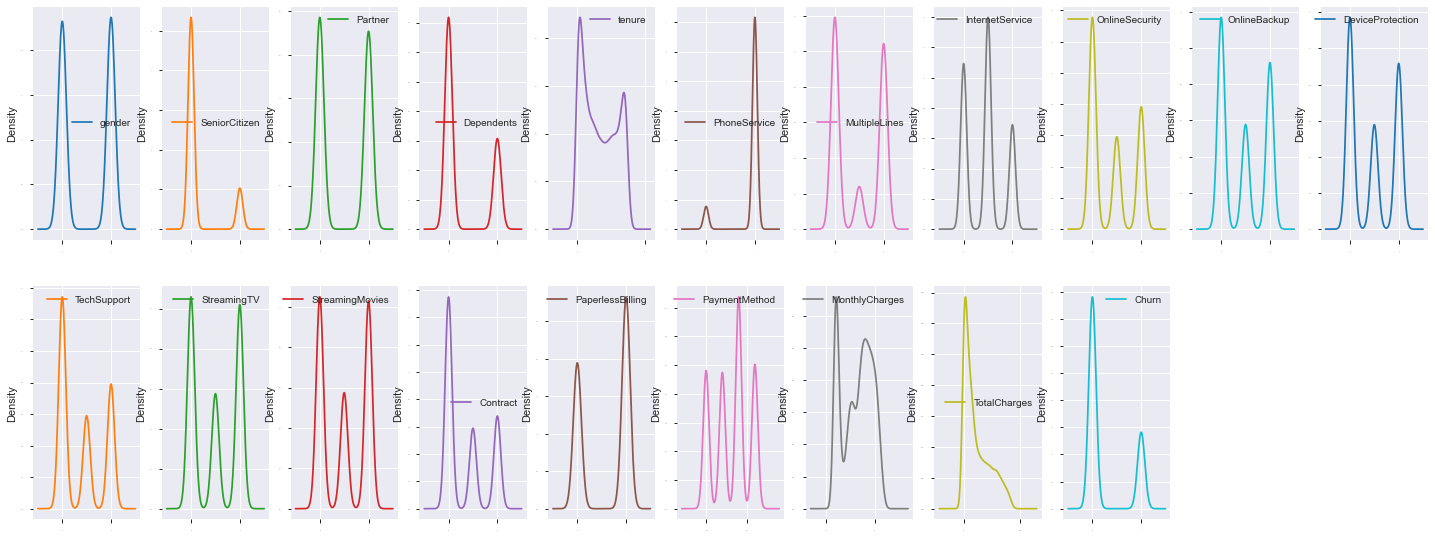

In [187]:
df.plot(kind='density', subplots=True, layout=(6,11), legend=True, sharex=False, fontsize=1, figsize=(25,30)) 
plt.show()

In [188]:
#checking correlation with each feature
df.corr()["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199037
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

Higher Monthly Charges translate to higher customer churn.

Whereas focused efforts on better Customer Service-that includes Streaming, Internet, Security, Tenure, Contract, TechSupport facilities-ensures  lower customer churn.

In [189]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [190]:
#Checking skewness
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
dtype: float64

As seen in the density plot earlier, skewness can be observed in the data above the threshold value of +-0.50.

In [191]:
#using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

In [192]:
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew() #skewness removed

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
PhoneService       -2.727153
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.144337
dtype: float64

In [193]:
x=df_new

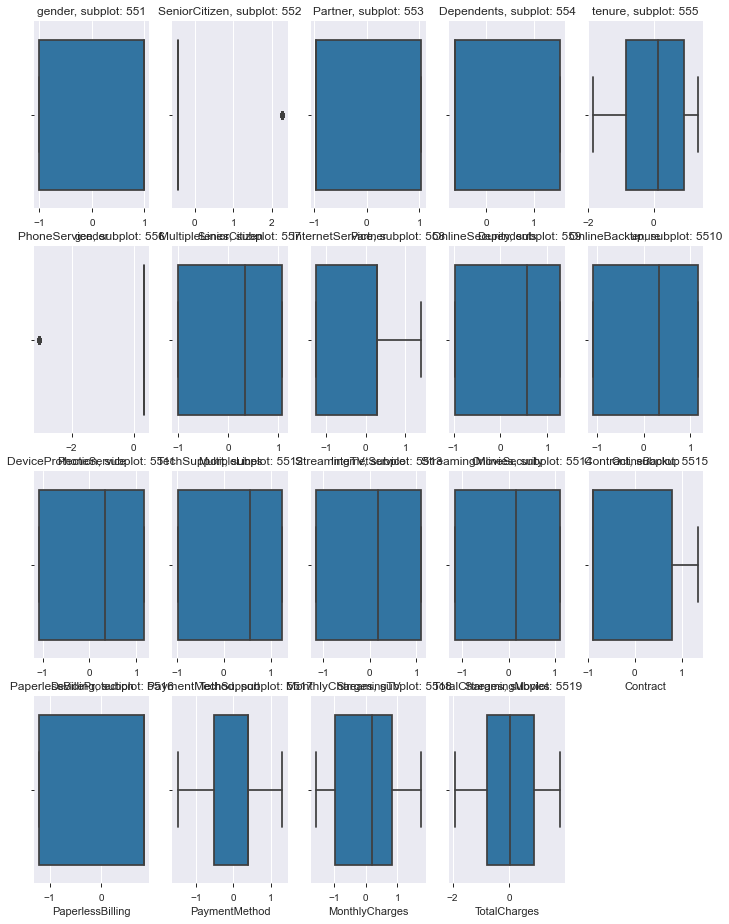

In [194]:
#Outlier check

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

a = 5  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(12,20))

for i in cols:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(x[i])
    c = c + 1

plt.show()

There are no outliers in this dataset.

In [195]:
#Scaling the data
std = StandardScaler()
x = std.fit_transform(x)

Optimal Random State

In [196]:
maxAccuracy=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.25, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc= accuracy_score(y_test, predlr)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRS=i
print("Best accuracy is",maxAccuracy, "on Random_State ", maxRS)

Best accuracy is 0.8336172629187961 on Random_State  935


In [197]:
#creating train test split using 935 as random state
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.25, random_state=935)

In [207]:
models = {"Logistic": LogisticRegression(),
              "Ridge": RidgeClassifier(),
              "KNN": KNeighborsClassifier(),
              "DTC": DecisionTreeClassifier(),
              "RF": RandomForestClassifier(),
              "NB": GaussianNB(),
              "GBM": GradientBoostingClassifier(),
              "ADA" : AdaBoostClassifier(),
              "XGB": XGBClassifier(),
              "SVM": SVC()}

In [208]:
results = []
model_names = []
scoring = 'accuracy'
for name, model in models.items():
    kfold = model_selection.KFold(n_splits=5, random_state=99)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    model_names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic: 0.796480 (0.005428)
Ridge: 0.791369 (0.009878)
KNN: 0.757478 (0.008518)
DTC: 0.716582 (0.015525)
RF: 0.784931 (0.009529)
NB: 0.751991 (0.012357)
GBM: 0.794588 (0.010466)
ADA: 0.790801 (0.010678)
[16:48:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the ob

We see our best performing model with highest cross validated score to be : Logistic Regression at 79.64% accuracy.

HyperParameter Tuning

In [200]:
parameters = {'penalty': ['l1','l2'], 
              'C': np.logspace(0,4,10)}

GCV = GridSearchCV(LogisticRegression(), param_grid=parameters, cv=5)

In [201]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [202]:
GCV.best_params_, GCV.best_score_

({'C': 1.0, 'penalty': 'l2'}, 0.7962913190562196)

In [203]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [204]:
accuracy_score(y_test,GCV_pred)

0.8336172629187961

In [205]:
import joblib
joblib.dump(GCV.best_estimator_,"Churn.pkl")

['Churn.pkl']